In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import norm

/Users/enriquecisneros/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Trial6_yaxis = pd.read_csv('Stage y_t6.csv')
Trial6_yaxis.columns = ['Index', 'Y position (nm)']
Trial6_yaxis['Y position (nm)'] = Trial6_yaxis['Y position (nm)'] *1000
Trial6_yaxis.describe(include = 'all')

,Index,Y position (nm)
count,101.000000,101.000000
mean,50.000000,117869.277228
std,29.300171,23.636886
min,0.000000,117825.000000
25%,25.000000,117855.000000
50%,50.000000,117866.000000
75%,75.000000,117876.000000
max,100.000000,117940.000000


In [3]:
Trial6_xaxis = pd.read_csv('Stage x_t6.csv')
Trial6_xaxis.columns = ['Index', 'X position (nm)']
Trial6_xaxis['X position (nm)'] = Trial6_xaxis['X position (nm)'] * 1000
Trial6_xaxis.describe(include = 'all')

,Index,X position (nm)
count,101.000000,101.000000
mean,50.000000,-57935.645545
std,29.300171,14.182359
min,0.000000,-57979.200000
25%,25.000000,-57939.800000
50%,50.000000,-57938.300000
75%,75.000000,-57930.700000
max,100.000000,-57889.800000


In [4]:
Trial6_Angles = pd.read_csv('3D ED Angle_t6.csv')
Trial6_Angles.columns = ['Index','Degree']
Trial6_Angles

,Index,Degree
0,0,49.0001
1,1,47.9997
2,2,46.9998
3,3,45.9999
4,4,44.9995
...,...,...
96,96,-46.9964
97,97,-47.9953
98,98,-48.9957
99,99,-49.9951


In [5]:
Trial6_Degree_Acquire = pd.read_csv('3D ED Degrees per Acquire_t6.csv')
Trial6_Degree_Acquire.columns = ['Index', 'Degree per Acquire']
Trial6_Degree_Acquire

,Index,Degree per Acquire
0,0,1.001380
1,1,1.000400
2,2,0.999912
3,3,0.999912
4,4,1.000400
...,...,...
96,96,1.000890
97,97,0.998936
98,98,1.000400
99,99,0.999424


In [6]:
def plotfunc(degrees, Yaxis, Xaxis, title, **kwargs):
    fig, ax = plt.subplots(1,2, **kwargs)
    ax[0].plot(degrees.iloc[:,1], Yaxis.iloc[:,1], label = 'Y stage', color = 'blue')
    ax[1].plot(degrees.iloc[:,1], Xaxis.iloc[:,1], label = 'X stage', color = 'red')
    
    
    ax[0].set(ylabel = 'Y stage position (nm)')
    ax[1].set(ylabel = 'X stage position (nm)')
    
    for i in range(len(ax)):
        ax[i].set(title = title,
                 xlabel = 'Alpha Angle')
        plt.tight_layout()
    plt.legend()
    
    

115.0
89.39999999999418


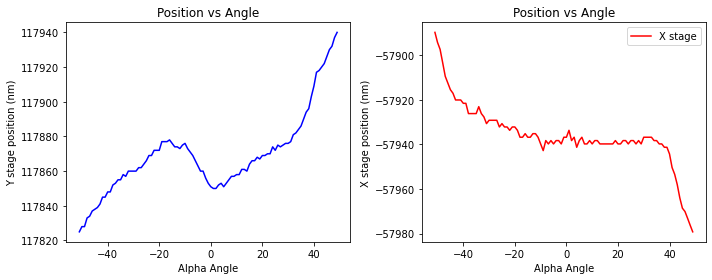

In [7]:
plotfunc(Trial6_Angles, Trial6_yaxis, Trial6_xaxis, 'Position vs Angle', figsize = (10,4))
print(np.max(Trial6_yaxis['Y position (nm)']) - np.min(Trial6_yaxis['Y position (nm)']))
print(np.max(Trial6_xaxis['X position (nm)']) - np.min(Trial6_xaxis['X position (nm)']))

23.519580556255672


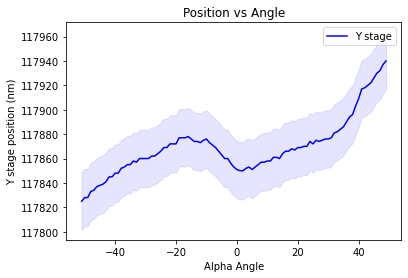

In [8]:
plt.plot(Trial6_Angles['Degree'], Trial6_yaxis['Y position (nm)'], color = 'blue', label = 'Y stage')
Trial6Ystd = np.std(Trial6_yaxis['Y position (nm)'])
plt.fill_between(Trial6_Angles['Degree'], Trial6_yaxis['Y position (nm)'] - Trial6Ystd, Trial6_yaxis['Y position (nm)'] + Trial6Ystd, color = 'blue', alpha = 0.1)
plt.xlabel('Alpha Angle')
plt.ylabel('Y stage position (nm)')
plt.title('Position vs Angle')
plt.legend()
print(Trial6Ystd)

14.111974584856736


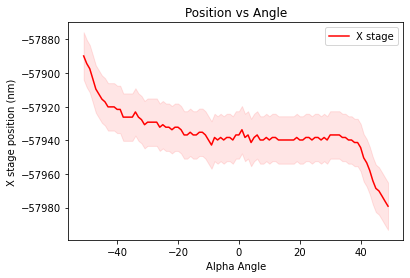

In [9]:
plt.plot(Trial6_Angles['Degree'], Trial6_xaxis['X position (nm)'], color = 'red', label = 'X stage')
Trial6Xstd = np.std(Trial6_xaxis['X position (nm)'])
plt.fill_between(Trial6_Angles['Degree'], Trial6_xaxis['X position (nm)'] - Trial6Xstd, Trial6_xaxis['X position (nm)'] + Trial6Xstd, color = 'red', alpha = 0.1)
plt.xlabel('Alpha Angle')
plt.ylabel('X stage position (nm)')
plt.title('Position vs Angle')
plt.legend()
print(Trial6Xstd)

In [10]:
Trial6_xaxis['X position (nm)']

0     -57979.2
1     -57976.2
2     -57973.1
3     -57970.1
4     -57968.6
        ...   
96    -57909.5
97    -57903.4
98    -57897.4
99    -57894.3
100   -57889.8
Name: X position (nm), Length: 101, dtype: float64

In [11]:
def histplot(data, **kwargs):
    fig, ax = plt.subplots(1)
    ax.hist(data.iloc[:,1], **kwargs)
    ax.set(xlabel = 'Change in Degrees', title = 'Degrees per Acquire')
 
    if kwargs.get('density', False):
        Mean, Std = norm.fit(data.iloc[:,1])
        xmin, xmax = ax.get_xlim()
        x = np.linspace(xmin, xmax, len(data.iloc[:,1]))
        plt.plot(x, norm.pdf(x, Mean, Std), color = 'red')
        ax.set(ylabel = 'Occurences')
    else:
        ax.set(ylabel = 'Occurences')
    print(f'The mean is {np.mean(data.iloc[:,1])} and the standard deviation is {np.std(data.iloc[:,1])} for this trial.')



The mean is 0.9999750891089106 and the standard deviation is 0.0009657494304200425 for this trial.


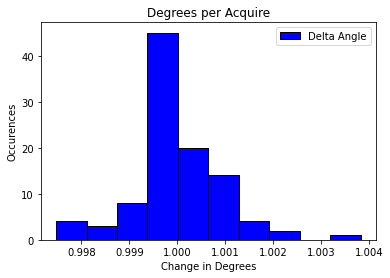

In [12]:
histplot(Trial6_Degree_Acquire, color = 'blue', edgecolor = 'black', label = 'Delta Angle')
plt.legend()

In [13]:
#Importing the other data
Trial7_yaxis = pd.read_csv('Stage y_t7.csv')
Trial7_xaxis = pd.read_csv('Stage x_t7.csv')
Trial7_Degree_Acquire = pd.read_csv('3D ED Degrees per Acquire_t7.csv')
Trial7_Angles = pd.read_csv('3D ED Angle_t7.csv')
Trial7_yaxis

,,um
0,Index,Slice0
1,0,118.19
2,1,118.185
3,2,118.179
4,3,118.177
...,...,...
97,96,118.072
98,97,118.072
99,98,118.066
100,99,118.065


In [14]:
def dataclean(data, data_type):
    '''
    Created this function so that I don't have to manually clean the csv file on the spreadsheet every time,
    like I did before on the trial 6 data. Saves more time by running a function.
    '''
    data = data.iloc[1:]
    data.columns = ['Index', data_type]
    data[data_type] = pd.to_numeric(data[data_type], errors='coerce')

    if data_type == 'Y position (nm)':
        data[data_type] = data[data_type] * 1000
    elif data_type == 'X position (nm)':
        data[data_type] = data[data_type] * 1000
    
    return data


In [15]:
Trial7_yaxis = dataclean(Trial7_yaxis, 'Y position (nm)')
Trial7_yaxis

/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = pd.to_numeric(data[data_type], errors='coerce')
/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = data[data_type] * 1000


,Index,Y position (nm)
1,0,118190.0
2,1,118185.0
3,2,118179.0
4,3,118177.0
5,4,118173.0
...,...,...
97,96,118072.0
98,97,118072.0
99,98,118066.0
100,99,118065.0


In [16]:
#Now for the rest of the data for trial 7
Trial7_xaxis = dataclean(Trial7_xaxis, 'X position (nm)')
Trial7_xaxis

/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = pd.to_numeric(data[data_type], errors='coerce')
/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = data[data_type] * 1000


,Index,X position (nm)
1,0,-57933.7
2,1,-57929.2
3,2,-57929.2
4,3,-57923.1
5,4,-57923.1
...,...,...
97,96,-57868.6
98,97,-57865.5
99,98,-57858.0
100,99,-57850.4


In [17]:
Trial7_Degree_Acquire = dataclean(Trial7_Degree_Acquire, 'Degree per Acquire')
Trial7_Degree_Acquire

/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = pd.to_numeric(data[data_type], errors='coerce')


,Index,Degree per Acquire
1,0,1.001380
2,1,1.000890
3,2,0.999424
4,3,0.999912
5,4,1.000400
...,...,...
97,96,1.000890
98,97,1.000400
99,98,0.998448
100,99,1.000400


In [18]:
Trial7_Angles = dataclean(Trial7_Angles, 'Degree')
Trial7_Angles

/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = pd.to_numeric(data[data_type], errors='coerce')


,Index,Degree
1,0,49.0001
2,1,47.9992
3,2,46.9998
4,3,45.9999
5,4,44.9995
...,...,...
97,96,-46.9968
98,97,-47.9972
99,98,-48.9957
100,99,-49.9961


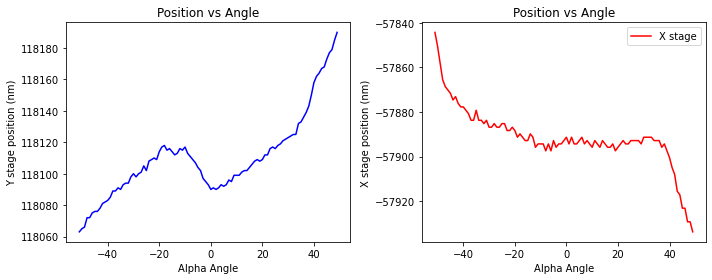

In [19]:
plotfunc(Trial7_Angles, Trial7_yaxis, Trial7_xaxis, 'Position vs Angle', figsize = (10,4) )

The mean is 0.999980178217821 and the standard deviation is 0.0009499045954808336 for this trial.


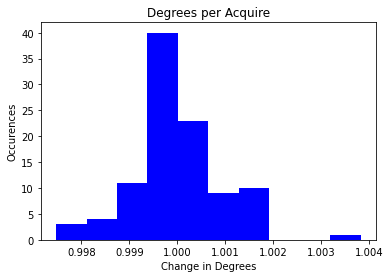

In [20]:
histplot(Trial7_Degree_Acquire, bins = 10, color = 'blue')

In [21]:
#Now for trial 8 
#Importing the other data
Trial8_yaxis = pd.read_csv('Stage y_t8.csv')
Trial8_xaxis = pd.read_csv('Stage x_t8.csv')
Trial8_Degree_Acquire = pd.read_csv('3D ED Degrees per Acquire_t8.csv')
Trial8_Angles = pd.read_csv('3D ED Angle_t8.csv')
Trial8_yaxis

,,um
0,Index,Slice0
1,0,118.01
2,1,118.005
3,2,118.001
4,3,117.997
...,...,...
97,96,117.898
98,97,117.895
99,98,117.894
100,99,117.891


In [22]:
Trial8_yaxis = dataclean(Trial8_yaxis, 'Y position (nm)')
Trial8_xaxis = dataclean(Trial8_xaxis, 'X position (nm)')
Trial8_Degree_Acquire = dataclean(Trial8_Degree_Acquire, 'Degree per Acquire')
Trial8_Angles = dataclean(Trial8_Angles, 'Degree')
Trial8_yaxis

/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = pd.to_numeric(data[data_type], errors='coerce')
/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = data[data_type] * 1000
/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Index,Y position (nm)
1,0,118010.0
2,1,118005.0
3,2,118001.0
4,3,117997.0
5,4,117993.0
...,...,...
97,96,117898.0
98,97,117895.0
99,98,117894.0
100,99,117891.0


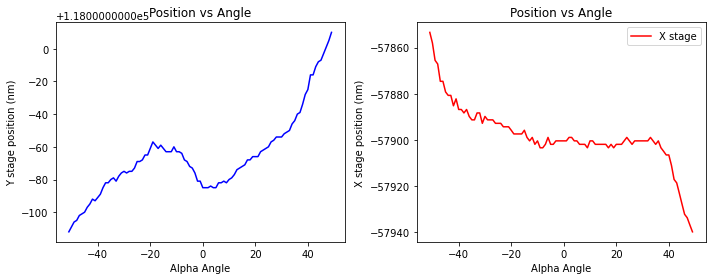

In [23]:
plotfunc(Trial8_Angles, Trial8_yaxis, Trial8_xaxis, 'Position vs Angle', figsize = (10,4))

The mean is 0.9999703762376233 and the standard deviation is 0.0009625084682819941 for this trial.


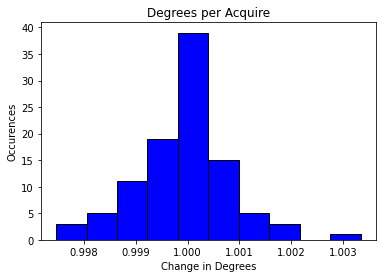

In [24]:
histplot(Trial8_Degree_Acquire, bins = 10, color = 'blue', edgecolor = 'black')

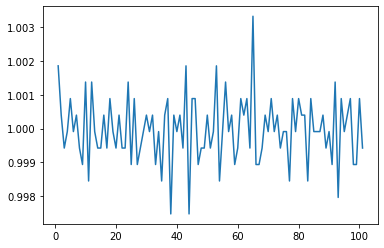

In [25]:
plt.plot(Trial8_Degree_Acquire['Degree per Acquire'])

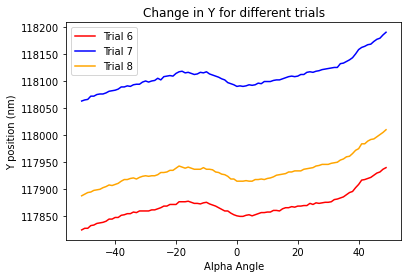

In [26]:
plt.plot(Trial6_Angles['Degree'], Trial6_yaxis['Y position (nm)'], color = 'red', label = 'Trial 6')
plt.plot(Trial7_Angles['Degree'], Trial7_yaxis['Y position (nm)'], color = 'blue', label = 'Trial 7')
plt.plot(Trial8_Angles['Degree'], Trial8_yaxis['Y position (nm)'], color = 'orange', label = 'Trial 8')
plt.title('Change in Y for different trials')
plt.xlabel('Alpha Angle')
plt.ylabel('Y position (nm)')
plt.legend()




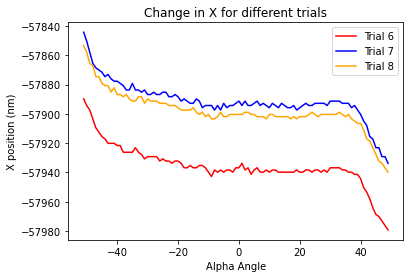

In [27]:
plt.plot(Trial6_Angles['Degree'], Trial6_xaxis['X position (nm)'], color = 'red', label = 'Trial 6')
plt.plot(Trial7_Angles['Degree'], Trial7_xaxis['X position (nm)'], color = 'blue', label = 'Trial 7')
plt.plot(Trial8_Angles['Degree'], Trial8_xaxis['X position (nm)'], color = 'orange', label = 'Trial 8')
plt.title('Change in X for different trials')
plt.xlabel('Alpha Angle')
plt.ylabel('X position (nm)')
plt.legend()

In [28]:
#Looking at the Z-data
Trial6_zaxis = pd.read_csv('Stage z_t6.csv')
Trial7_zaxis = pd.read_csv('Stage z_t7.csv')
Trial8_zaxis = pd.read_csv('Stage z_t8.csv')

In [29]:
Trial6_zaxis = dataclean(Trial6_zaxis, 'Z position (nm)')
Trial7_zaxis = dataclean(Trial7_zaxis, 'Z position (nm)')
Trial8_zaxis = dataclean(Trial8_zaxis, 'Z position (nm)')

/var/folders/60/0qvlk8x53174dqfb2_723td40000gn/T/ipykernel_88429/2125034764.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_type] = pd.to_numeric(data[data_type], errors='coerce')


In [42]:
Trial6Ystd = np.std(Trial6_yaxis['Y position (nm)'])
Trial7Ystd = np.std(Trial7_yaxis['Y position (nm)'])
Trial8Ystd = np.std(Trial8_yaxis['Y position (nm)'])
Error_in_y = [Trial6Ystd, Trial7Ystd, Trial8Ystd]
print(np.mean(Error_in_y))

25.045905167450545


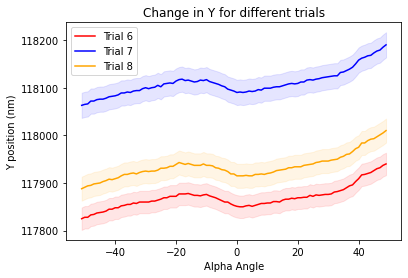

In [31]:
plt.plot(Trial6_Angles['Degree'], Trial6_yaxis['Y position (nm)'], color = 'red', label = 'Trial 6')
plt.plot(Trial7_Angles['Degree'], Trial7_yaxis['Y position (nm)'], color = 'blue', label = 'Trial 7')
plt.plot(Trial8_Angles['Degree'], Trial8_yaxis['Y position (nm)'], color = 'orange', label = 'Trial 8')
plt.title('Change in Y for different trials')
plt.xlabel('Alpha Angle')
plt.ylabel('Y position (nm)')
plt.legend()

plt.fill_between(Trial6_Angles['Degree'], Trial6_yaxis['Y position (nm)'] - Trial6Ystd, Trial6_yaxis['Y position (nm)'] + Trial6Ystd, color = 'red', alpha = 0.1)
plt.fill_between(Trial7_Angles['Degree'], Trial7_yaxis['Y position (nm)'] - Trial7Ystd, Trial7_yaxis['Y position (nm)'] + Trial7Ystd, color = 'blue', alpha = 0.1)
plt.fill_between(Trial8_Angles['Degree'], Trial8_yaxis['Y position (nm)'] - Trial8Ystd, Trial8_yaxis['Y position (nm)'] + Trial8Ystd, color = 'orange', alpha = 0.1)

In [43]:
Trial6Xstd = np.std(Trial6_xaxis['X position (nm)'])
Trial7Xstd = np.std(Trial7_xaxis['X position (nm)'])
Trial8Xstd = np.std(Trial8_xaxis['X position (nm)'])
error_x = [Trial6Xstd, Trial7Xstd,Trial8Xstd]
print(np.mean(error_x))

13.65019899422689


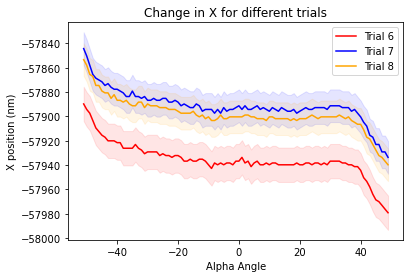

In [33]:
plt.plot(Trial6_Angles['Degree'], Trial6_xaxis['X position (nm)'], color = 'red', label = 'Trial 6')
plt.plot(Trial7_Angles['Degree'], Trial7_xaxis['X position (nm)'], color = 'blue', label = 'Trial 7')
plt.plot(Trial8_Angles['Degree'], Trial8_xaxis['X position (nm)'], color = 'orange', label = 'Trial 8')
plt.title('Change in X for different trials')
plt.xlabel('Alpha Angle')
plt.ylabel('X position (nm)')
plt.legend()

plt.fill_between(Trial6_Angles['Degree'], Trial6_xaxis['X position (nm)'] - Trial6Xstd, Trial6_xaxis['X position (nm)'] + Trial6Xstd, color = 'red', alpha = 0.1)
plt.fill_between(Trial7_Angles['Degree'], Trial7_xaxis['X position (nm)'] - Trial7Xstd, Trial7_xaxis['X position (nm)'] + Trial7Xstd, color = 'blue', alpha = 0.1)
plt.fill_between(Trial8_Angles['Degree'], Trial8_xaxis['X position (nm)'] - Trial8Xstd, Trial8_xaxis['X position (nm)'] + Trial8Xstd, color = 'orange', alpha = 0.1)

In [34]:
#Can try to find the error in the histogram since they do not have positions

Text(0.5, 1.0, 'Degree per Acquire')

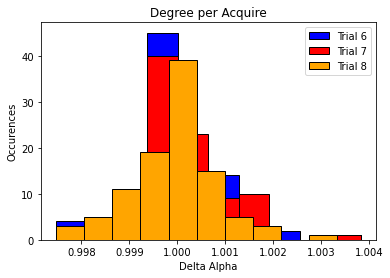

In [35]:
plt.hist(Trial6_Degree_Acquire['Degree per Acquire'], color = 'blue', label = 'Trial 6', edgecolor = 'black')
plt.hist(Trial7_Degree_Acquire['Degree per Acquire'], color = 'red', label = 'Trial 7', edgecolor = 'black')
plt.hist(Trial8_Degree_Acquire['Degree per Acquire'], color = 'orange', label = 'Trial 8', edgecolor = 'black')
plt.legend()
plt.xlabel('Delta Alpha')
plt.ylabel('Occurences')
plt.title('Degree per Acquire')

In [40]:
Difference_6y = np.max(Trial6_yaxis['Y position (nm)']) - np.min(Trial6_yaxis['Y position (nm)'])
Difference_7y = np.max(Trial7_yaxis['Y position (nm)']) - np.min(Trial7_yaxis['Y position (nm)'])
Difference_8y = np.max(Trial8_yaxis['Y position (nm)']) - np.min(Trial8_yaxis['Y position (nm)'])
Difference_avey = [Difference_6y, Difference_7y, Difference_8y]
print(np.mean(Difference_avey))

121.33333333333333


In [41]:
Difference_6x = np.max(Trial6_xaxis['X position (nm)']) - np.min(Trial6_xaxis['X position (nm)'])
Difference_7x = np.max(Trial7_xaxis['X position (nm)']) - np.min(Trial7_xaxis['X position (nm)'])
Difference_8x = np.max(Trial8_xaxis['X position (nm)']) - np.min(Trial8_xaxis['X position (nm)'])
Difference_avex = [Difference_6x, Difference_7x, Difference_8x]
print(np.mean(Difference_avex))

88.39999999999903


In [44]:
Trial6Astd = np.std(Trial6_Angles['Degree'])
Trial7Astd = np.std(Trial7_Angles['Degree'])
Trial8Astd = np.std(Trial8_Angles['Degree'])
error_a = [Trial6Astd, Trial7Astd,Trial8Astd]
print(np.mean(error_a))

29.15339565088003


In [45]:
Trial6Aave = np.mean(Trial6_Angles['Degree'])
Trial7Aave = np.mean(Trial7_Angles['Degree'])
Trial8Aave = np.mean(Trial8_Angles['Degree'])
error_ave = [Trial6Aave, Trial7Aave,Trial8Aave]
print(np.mean(error_ave))

-0.9974737161716161


In [1]:
pip install mrcfile

     |████████████████████████████████| 44 kB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
